In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ƒê·ªçc file ng∆∞·ªùi d√πng t·∫£i l√™n
file_path = "../data/extracted_features.csv"
df = pd.read_csv(file_path)

# Th√¥ng tin c∆° b·∫£n
info = df.info()
head = df.head()
desc = df.describe()

print(df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       621 non-null    float64
 1   MDVP:Fhi(Hz)      621 non-null    float64
 2   MDVP:Flo(Hz)      621 non-null    float64
 3   MDVP:Jitter(%)    621 non-null    float64
 4   MDVP:Jitter(Abs)  621 non-null    float64
 5   MDVP:RAP          621 non-null    float64
 6   MDVP:PPQ          621 non-null    float64
 7   Jitter:DDP        621 non-null    float64
 8   MDVP:Shimmer      621 non-null    float64
 9   MDVP:Shimmer(dB)  621 non-null    float64
 10  Shimmer:APQ3      621 non-null    float64
 11  Shimmer:APQ5      621 non-null    float64
 12  MDVP:APQ          619 non-null    float64
 13  Shimmer:DDA       621 non-null    float64
 14  HNR               621 non-null    float64
 15  NHR               621 non-null    float64
 16  DFA               621 non-null    float64
 1

In [3]:
value_null = df.isnull().sum()
print(value_null)


MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            2
Shimmer:DDA         0
HNR                 0
NHR                 0
DFA                 0
D2                  0
spread1             0
spread2             0
PPE                 0
id                  0
class               0
dtype: int64


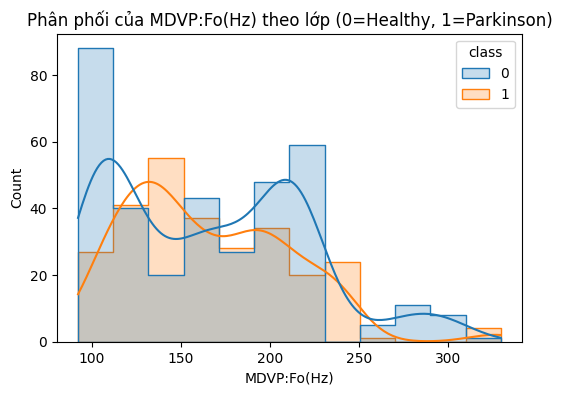

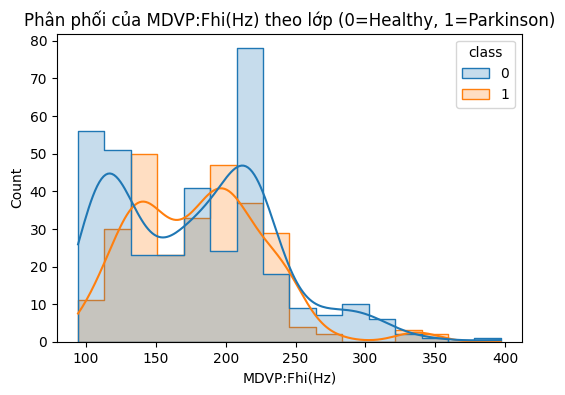

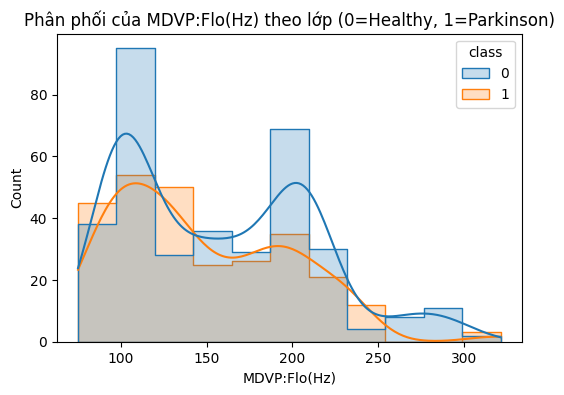

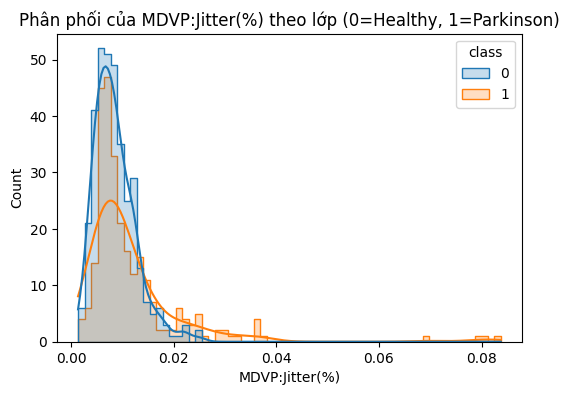

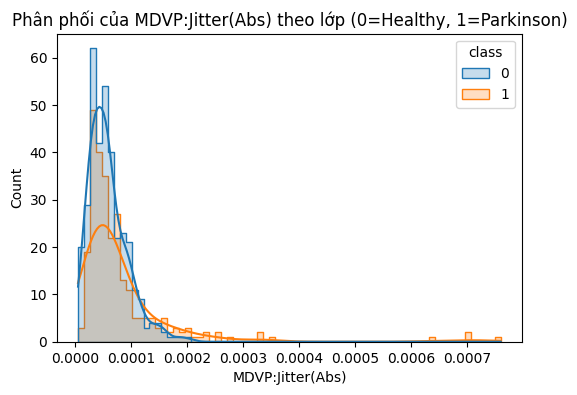

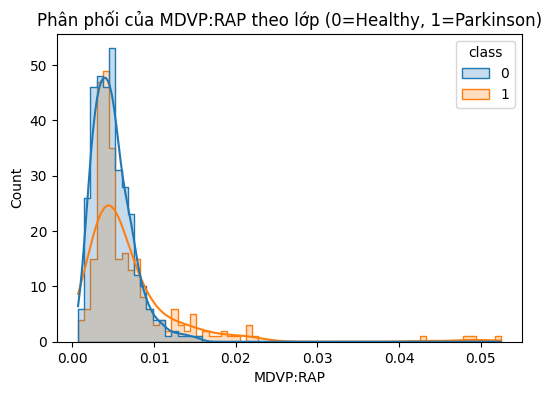

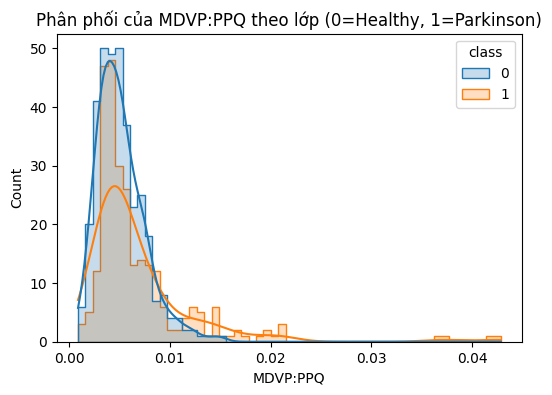

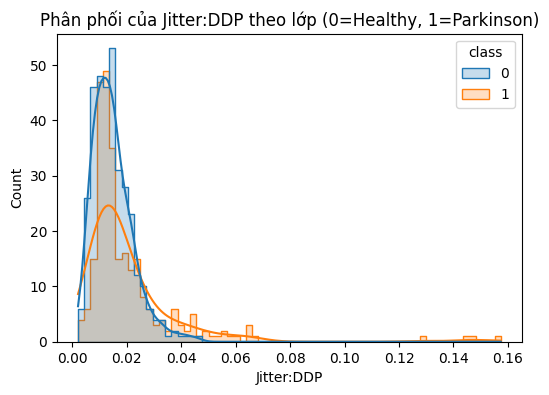

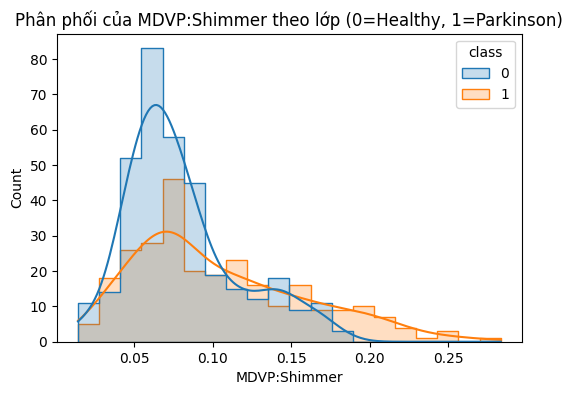

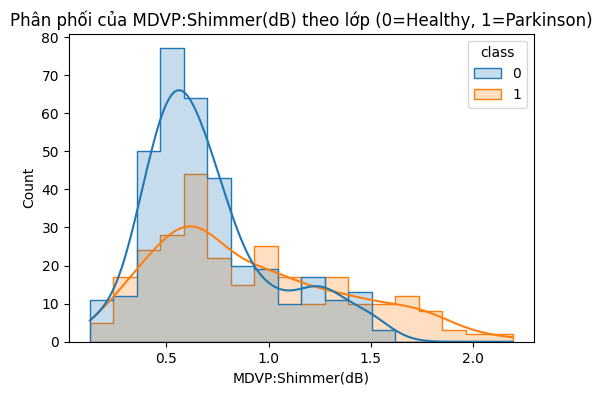

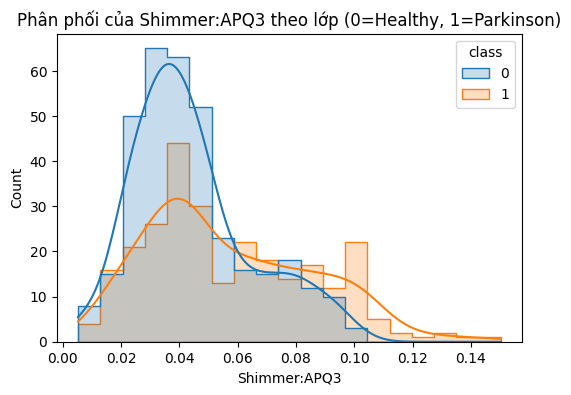

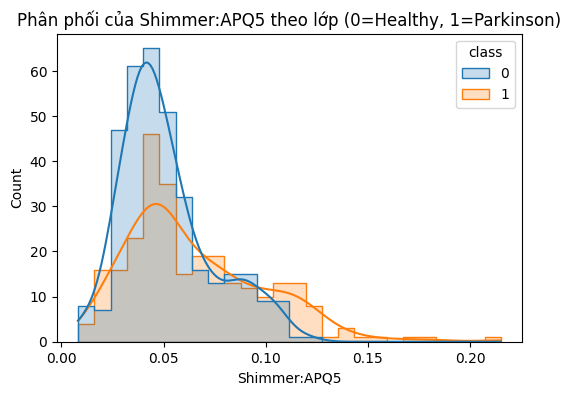

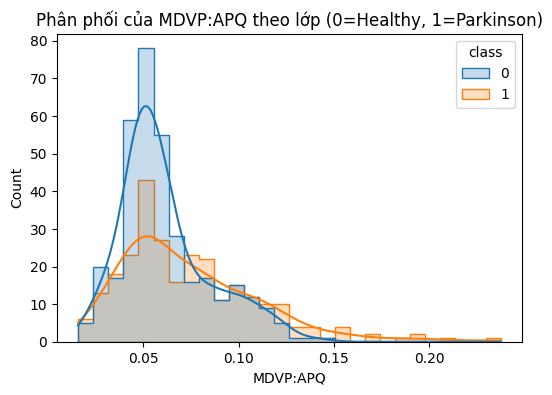

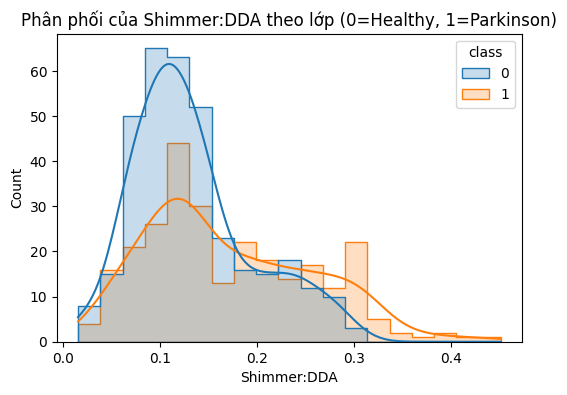

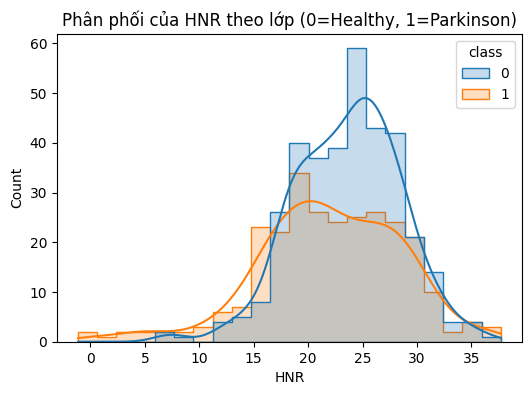

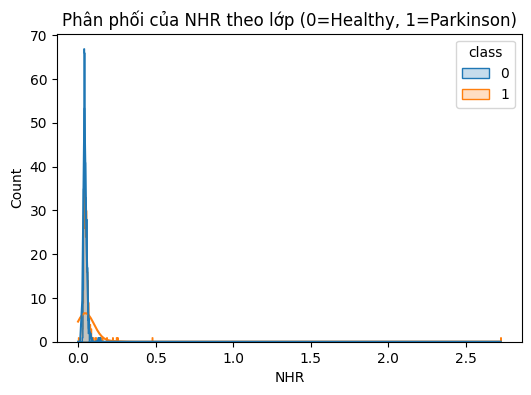

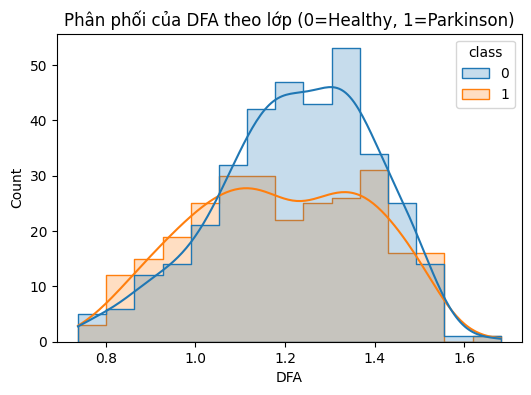

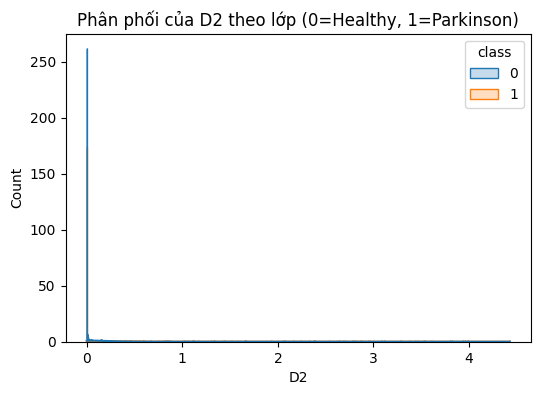

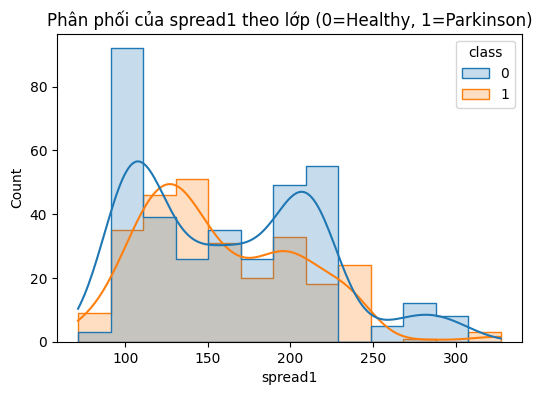

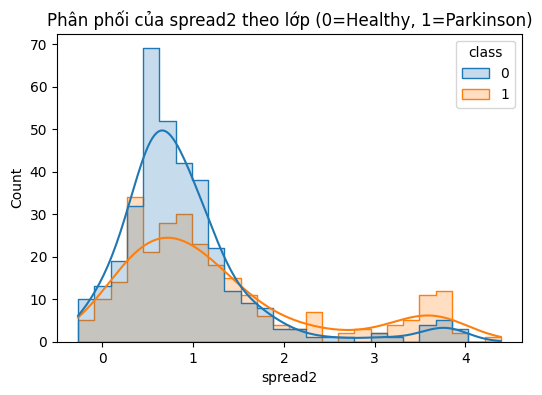

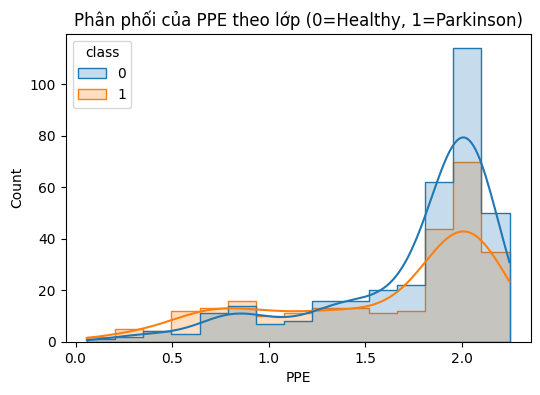

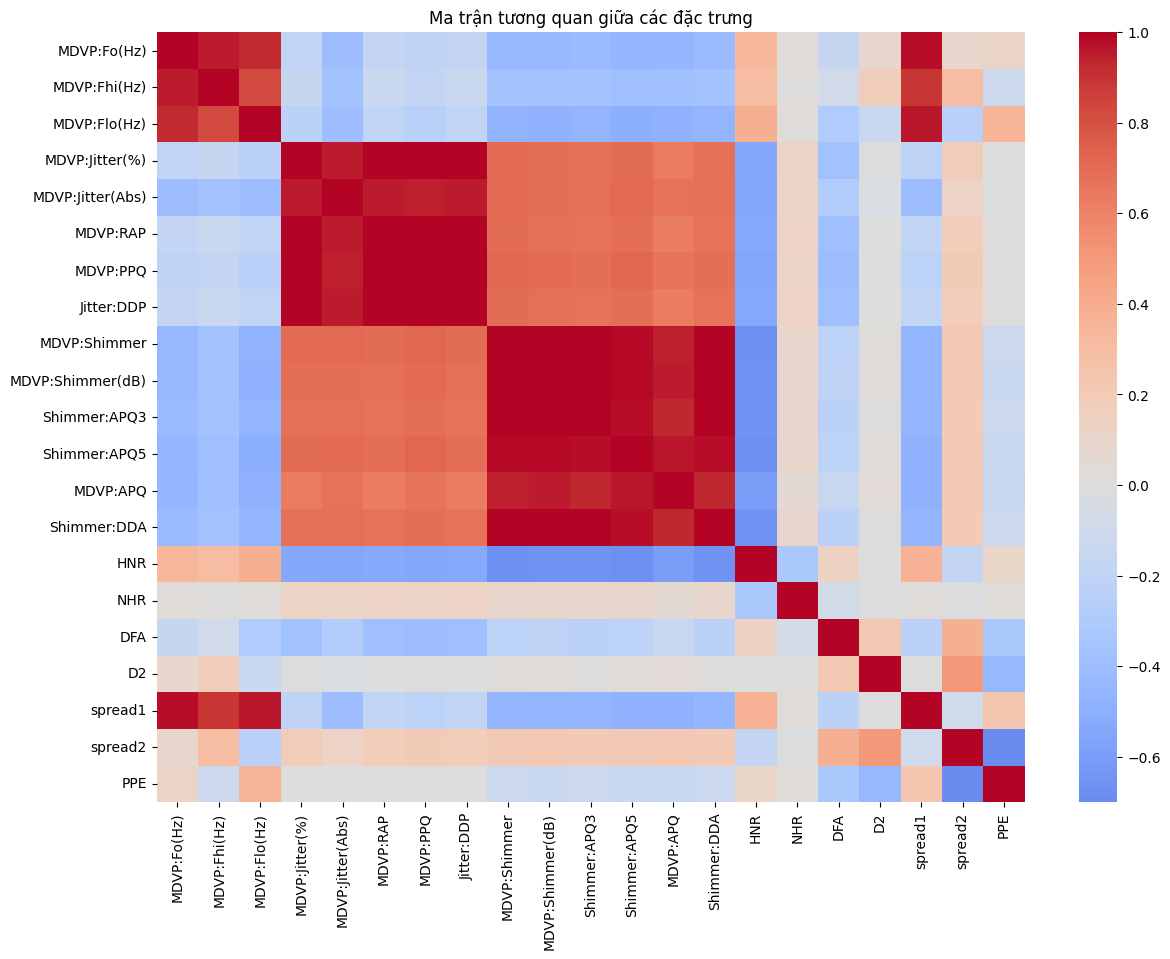

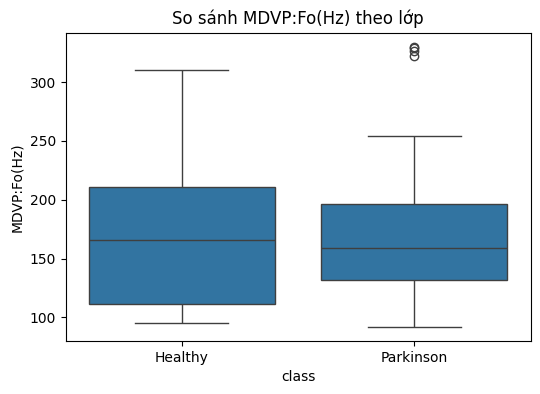

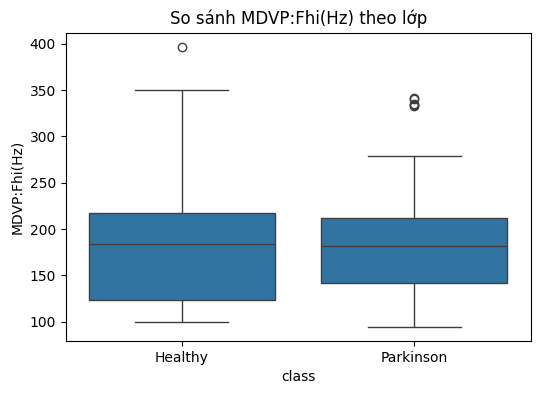

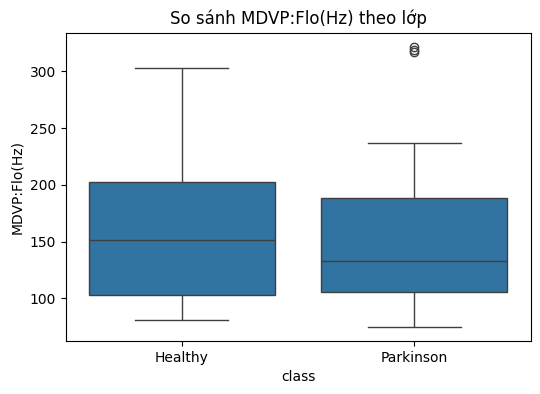

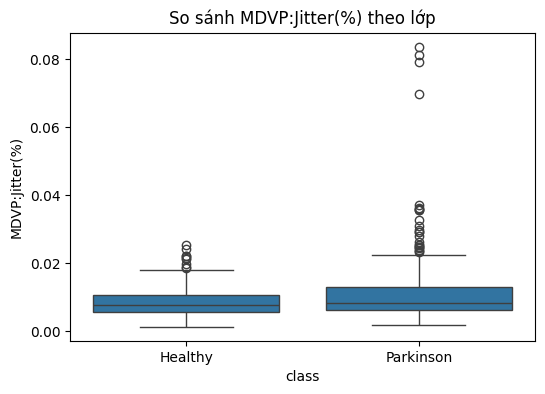

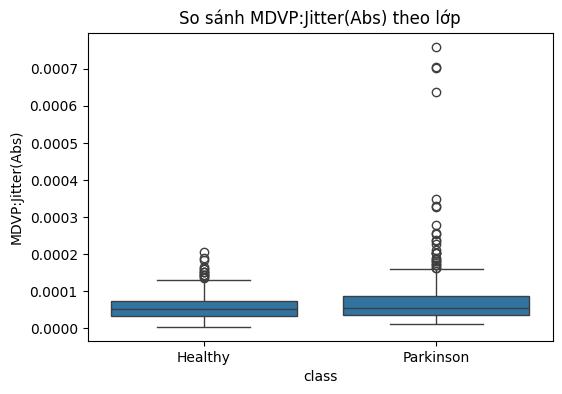

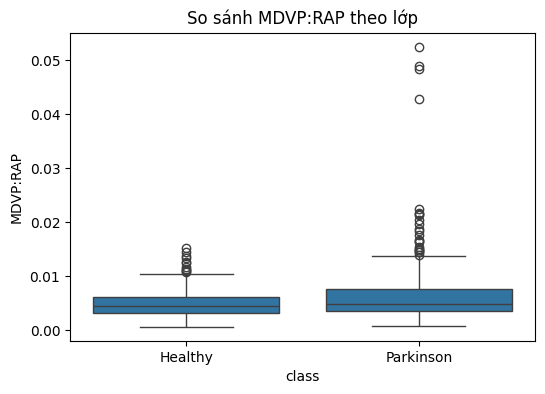

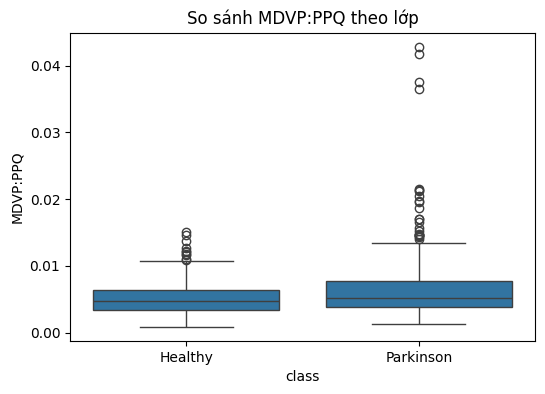

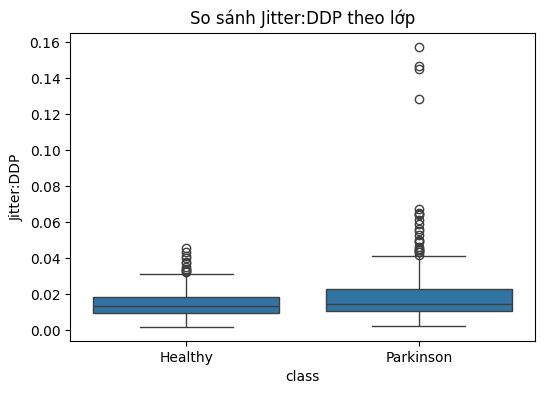

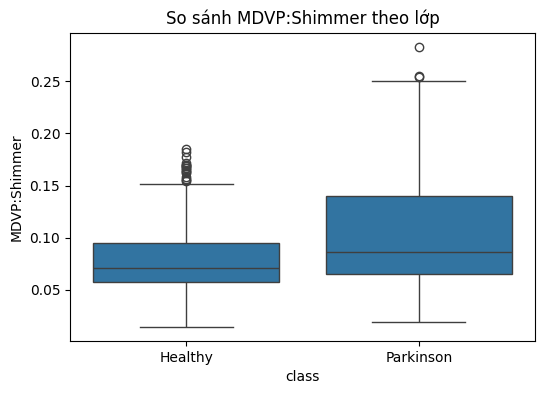

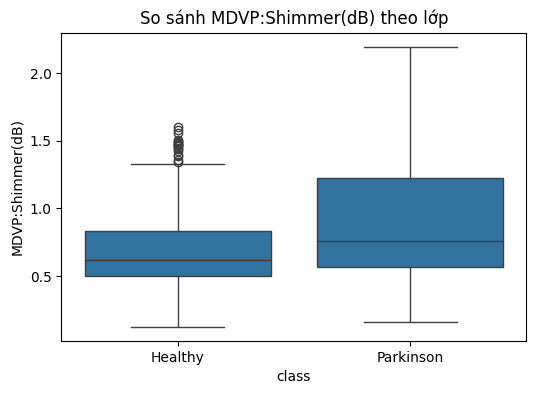

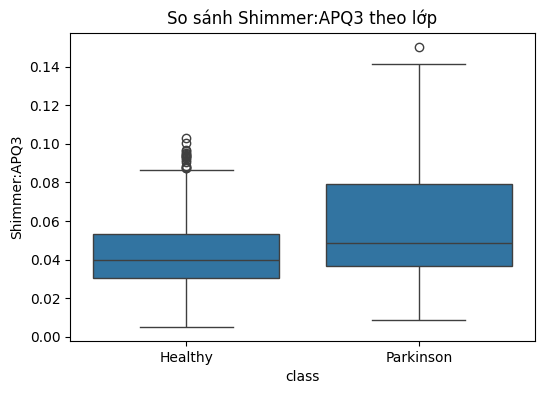

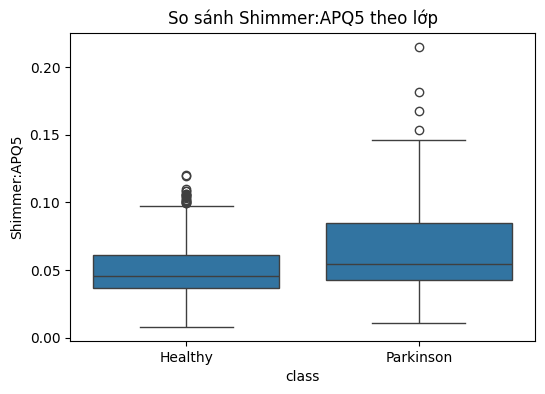

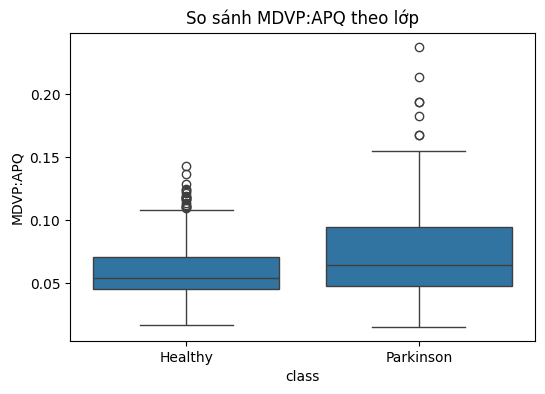

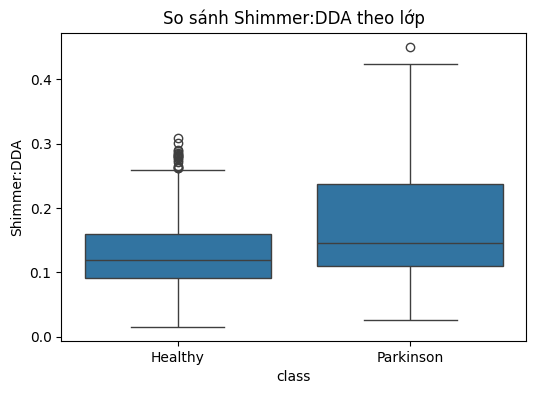

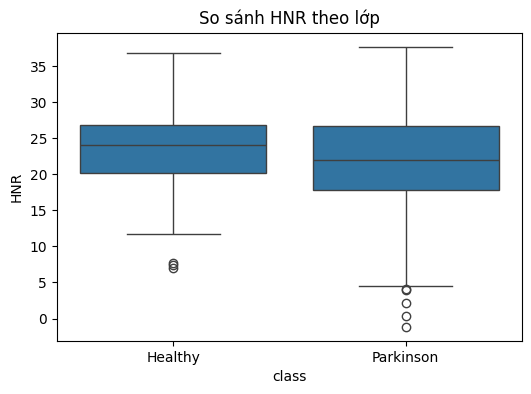

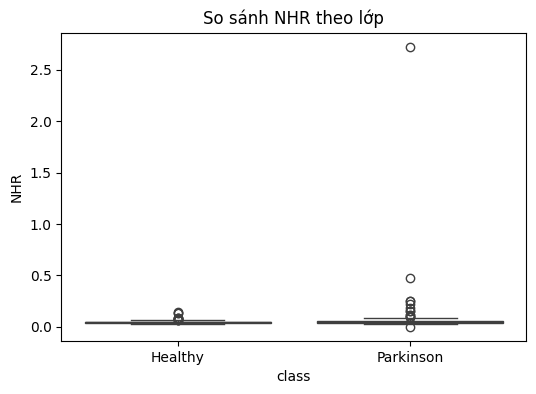

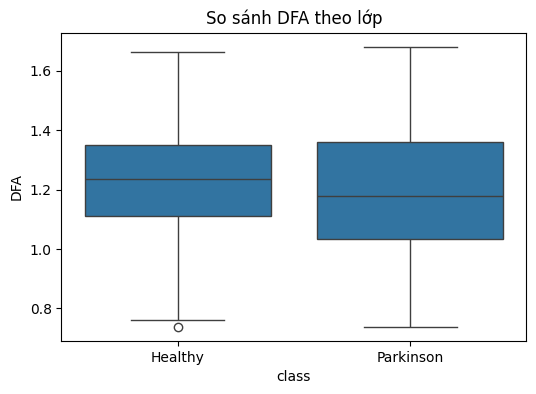

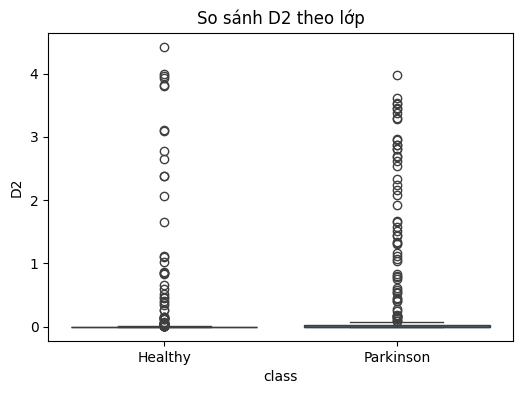

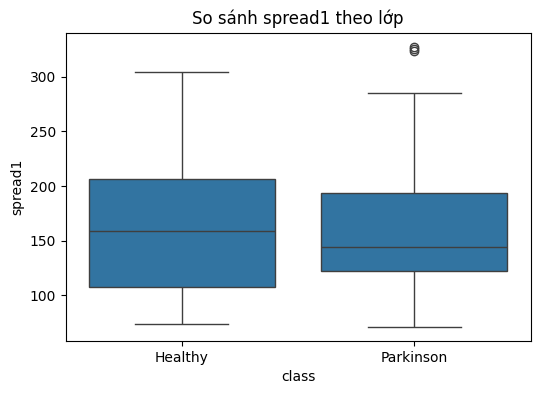

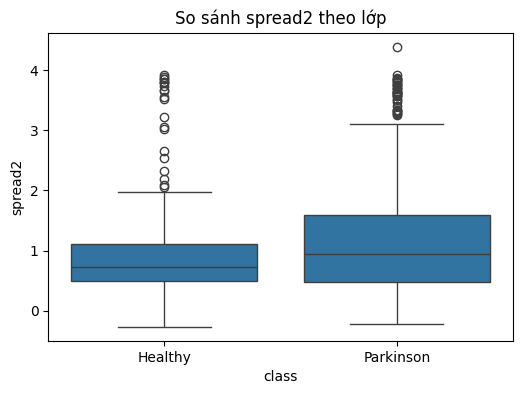

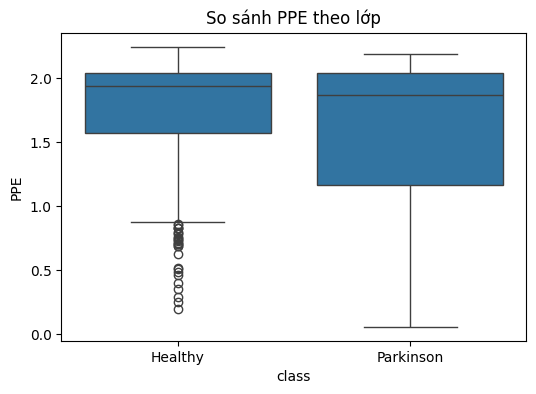

In [4]:
# Sau khi reset, c·∫ßn import l·∫°i v√† load l·∫°i d·ªØ li·ªáu

# Load l·∫°i file
file_path = "../data/extracted_features.csv"
df = pd.read_csv(file_path)

# Lo·∫°i b·ªè c·ªôt id
df_viz = df.drop(columns=["id"])

# 1. Bi·ªÉu ƒë·ªì ph√¢n ph·ªëi c·ªßa m·ªôt v√†i ƒë·∫∑c tr∆∞ng quan tr·ªçng
features_to_plot = ["MDVP:Fo(Hz)", "MDVP:Fhi(Hz)", "MDVP:Flo(Hz)", 
                    "MDVP:Jitter(%)", "MDVP:Jitter(Abs)", "MDVP:RAP", "MDVP:PPQ", "Jitter:DDP", 
                    "MDVP:Shimmer", "MDVP:Shimmer(dB)", "Shimmer:APQ3", "Shimmer:APQ5", "MDVP:APQ", "Shimmer:DDA", 
                    "HNR", "NHR", "DFA", "D2", "spread1", "spread2", "PPE"]

for col in features_to_plot:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df_viz, x=col, hue="class", kde=True, element="step")
    plt.title(f"Ph√¢n ph·ªëi c·ªßa {col} theo l·ªõp (0=Healthy, 1=Parkinson)")
    plt.show()

# 2. Heatmap - Ma tr·∫≠n t∆∞∆°ng quan
plt.figure(figsize=(14,10))
corr = df_viz.drop(columns=["class"]).corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Ma tr·∫≠n t∆∞∆°ng quan gi·ªØa c√°c ƒë·∫∑c tr∆∞ng")
plt.show()

# 3. Boxplot so s√°nh Healthy vs Parkinson cho m·ªôt s·ªë ƒë·∫∑c tr∆∞ng
for col in features_to_plot:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df_viz, x="class", y=col)
    plt.title(f"So s√°nh {col} theo l·ªõp")
    plt.xticks([0,1], ["Healthy", "Parkinson"])
    plt.show()


In [ ]:
# %% [markdown]
# # Quy Tr√¨nh Ti·ªÅn X·ª≠ L√Ω D·ªØ Li·ªáu To√†n Di·ªán
# 
# ## T√≥m t·∫Øt c√°c b∆∞·ªõc:
# 1.  **T·∫£i D·ªØ Li·ªáu G·ªëc:** ƒê·ªçc t·ªáp `extracted_features.csv`.
# 2.  **B∆∞·ªõc 1: X·ª≠ L√Ω D·ªØ Li·ªáu Thi·∫øu:** L·∫•p ƒë·∫ßy c√°c gi√° tr·ªã `NaN` b·∫±ng ph∆∞∆°ng ph√°p trung b√¨nh.
# 3.  **B∆∞·ªõc 2: X·ª≠ L√Ω Gi√° Tr·ªã Ngo·∫°i Lai (Outliers):** √Åp d·ª•ng ph∆∞∆°ng ph√°p Clipping (IQR) ƒë·ªÉ gi·ªõi h·∫°n c√°c gi√° tr·ªã b·∫•t th∆∞·ªùng.
# 4.  **B∆∞·ªõc 3: L·ª±a Ch·ªçn ƒê·∫∑c Tr∆∞ng:** Lo·∫°i b·ªè c√°c c·ªôt kh√¥ng c·∫ßn thi·∫øt (`id`) v√† c√°c c·ªôt c√≥ t√≠nh ƒëa c·ªông tuy·∫øn cao.
# 5.  **L∆∞u K·∫øt Qu·∫£ Cu·ªëi C√πng:** L∆∞u DataFrame ƒë√£ ƒë∆∞·ª£c x·ª≠ l√Ω ho√†n ch·ªânh v√†o t·ªáp m·ªõi.

# %%
# Import c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# %% [markdown]
# ### T·∫£i D·ªØ Li·ªáu G·ªëc

# %%
# ƒê∆∞·ªùng d·∫´n ƒë·∫øn t·ªáp d·ªØ li·ªáu g·ªëc
file_path = '../data/combined_data.csv'

try:
    df = pd.read_csv(file_path)
    print(f"‚úÖ T·∫£i th√†nh c√¥ng d·ªØ li·ªáu g·ªëc. K√≠ch th∆∞·ªõc ban ƒë·∫ßu: {df.shape}")
except FileNotFoundError:
    print(f"‚ùå L·ªói: Kh√¥ng t√¨m th·∫•y t·ªáp '{file_path}'. Vui l√≤ng ki·ªÉm tra l·∫°i.")
    exit()

# %% [markdown]
# ### B∆∞·ªõc 1: X·ª≠ L√Ω D·ªØ Li·ªáu Thi·∫øu

# %%
if 'MDVP:APQ' in df.columns and df['MDVP:APQ'].isnull().any():
    mean_apq = df['MDVP:APQ'].mean()
    df['MDVP:APQ'].fillna(mean_apq, inplace=True)
    print("‚úÖ ƒê√£ x·ª≠ l√Ω gi√° tr·ªã thi·∫øu trong c·ªôt 'MDVP:APQ'.")
else:
    print("‚ÑπÔ∏è Kh√¥ng c√≥ gi√° tr·ªã thi·∫øu trong c·ªôt 'MDVP:APQ'.")


# %% [markdown]
# ### B∆∞·ªõc 2: X·ª≠ L√Ω Gi√° Tr·ªã Ngo·∫°i Lai (Outliers)

# %%
# Ch·ªçn c√°c c·ªôt s·ªë ƒë·ªÉ x·ª≠ l√Ω (tr·ª´ c·ªôt target 'class')
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
if 'class' in numerical_features:
    numerical_features.remove('class')

# print("B·∫Øt ƒë·∫ßu x·ª≠ l√Ω outlier...")
# for col in numerical_features:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# print("‚úÖ ƒê√£ x·ª≠ l√Ω xong outlier.")

# %% [markdown]
# ### B∆∞·ªõc 3: L·ª±a Ch·ªçn ƒê·∫∑c Tr∆∞ng

# %%
# C√°c c·ªôt ƒë∆∞·ª£c x√°c ƒë·ªãnh l√† d∆∞ th·ª´a d·ª±a tr√™n ph√¢n t√≠ch t∆∞∆°ng quan
features_to_drop = [
    'MDVP:Fo(Hz)', 'MDVP:Jitter(%)', 'MDVP:RAP', 'spread1', 'Shimmer:APQ5', 
    'MDVP:APQ', 'Shimmer:DDA', 'MDVP:PPQ', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'HNR'
]

# Th√™m c·ªôt 'id' v√†o danh s√°ch c·∫ßn b·ªè
features_to_drop.append('id')

# Lo·∫°i b·ªè c√°c c·ªôt
df_final = df.drop(columns=features_to_drop, errors='ignore')

print("‚úÖ ƒê√£ lo·∫°i b·ªè c√°c c·ªôt kh√¥ng c·∫ßn thi·∫øt v√† c√°c c·ªôt ƒëa c·ªông tuy·∫øn.")
print(f"S·ªë c·ªôt ƒë√£ lo·∫°i b·ªè: {len(features_to_drop)}")


# %% [markdown]
# ### B∆∞·ªõc 4: Ki·ªÉm Tra v√† L∆∞u K·∫øt Qu·∫£ Cu·ªëi C√πng

# %%
print("\n--- D·ªØ Li·ªáu Cu·ªëi C√πng Sau Khi X·ª≠ L√Ω ---")
print(f"K√≠ch th∆∞·ªõc cu·ªëi c√πng: {df_final.shape}")
print("\nC√°c c·ªôt ƒë∆∞·ª£c gi·ªØ l·∫°i:")
print(df_final.columns.tolist())

# L∆∞u t·ªáp CSV cu·ªëi c√πng
final_file_path = '../data/final_selected_features.csv'
df_final.to_csv(final_file_path, index=False)

print(f"\nüéâ Ho√†n t·∫•t! D·ªØ li·ªáu ƒë√£ ƒë∆∞·ª£c x·ª≠ l√Ω to√†n di·ªán v√† l∆∞u v√†o t·ªáp '{final_file_path}'.")

‚ùå L·ªói: Kh√¥ng t√¨m th·∫•y t·ªáp '../data/combined_data.csv'. Vui l√≤ng ki·ªÉm tra l·∫°i.
‚úÖ ƒê√£ x·ª≠ l√Ω gi√° tr·ªã thi·∫øu trong c·ªôt 'MDVP:APQ'.
‚úÖ ƒê√£ lo·∫°i b·ªè c√°c c·ªôt kh√¥ng c·∫ßn thi·∫øt v√† c√°c c·ªôt ƒëa c·ªông tuy·∫øn.
S·ªë c·ªôt ƒë√£ lo·∫°i b·ªè: 12

--- D·ªØ Li·ªáu Cu·ªëi C√πng Sau Khi X·ª≠ L√Ω ---
K√≠ch th∆∞·ªõc cu·ªëi c√πng: (621, 11)

C√°c c·ªôt ƒë∆∞·ª£c gi·ªØ l·∫°i:
['MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(Abs)', 'Jitter:DDP', 'Shimmer:APQ3', 'NHR', 'DFA', 'D2', 'spread2', 'PPE', 'class']

üéâ Ho√†n t·∫•t! D·ªØ li·ªáu ƒë√£ ƒë∆∞·ª£c x·ª≠ l√Ω to√†n di·ªán v√† l∆∞u v√†o t·ªáp '../data/final_selected_features.csv'.


C:\Users\phamh\AppData\Local\Temp\ipykernel_2520\296288377.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MDVP:APQ'].fillna(mean_apq, inplace=True)


: 